In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from gams import *

rcParams.update({'font.family':"serif", "font.serif": ["helvetica"]})
ws = GamsWorkspace("./")

In [25]:
db = ws.add_database_from_gdx("network_structure.gdx")
jc_db = ws.add_database_from_gdx("jc_recovery.gdx")

j_loc = np.zeros((8, 2))
c_loc = np.zeros((8, 2))
k_loc = np.zeros((20, 2))

for rec in db["k"]:
    k_loc[int(rec.key(0)) - 1, 0] = jc_db["Kloc_0"][rec.keys].value
    k_loc[int(rec.key(0)) - 1, 1] = jc_db["Kloc_1"][rec.keys].value
for rec in jc_db["j"]:
    j_loc[int(rec.key(0)) - 1, 0] = jc_db["jloc_0_est"][rec.keys].value
    j_loc[int(rec.key(0)) - 1, 1] = jc_db["jloc_1_est"][rec.keys].value
for rec in jc_db["c"]:
    c_loc[int(rec.key(0)) - 1, 0] = jc_db["cloc_0_est"][rec.keys].value
    c_loc[int(rec.key(0)) - 1, 1] = jc_db["cloc_1_est"][rec.keys].value

vj_sol = np.zeros((8, 8))
vc_sol = np.zeros((8, 8))
fjk_sol = np.zeros((8, 20, 8))
fkc_sol = np.zeros((20, 8, 8))
for rec in db["vj_samp_sol"]:
    vj_sol[int(rec.key(0)) - 1, int(rec.key(1)) - 1] = rec.value
for rec in db["vc_samp_sol"]:
    vc_sol[int(rec.key(0)) - 1, int(rec.key(1)) - 1] = rec.value
for rec in db["fjk_samp_sol"]:
    fjk_sol[int(rec.key(0)) - 1, int(rec.key(1)) - 1, int(rec.key(2)) - 1] = rec.value
for rec in db["fkc_samp_sol"]:
    fkc_sol[int(rec.key(0)) - 1, int(rec.key(1)) - 1, int(rec.key(2)) - 1] = rec.value

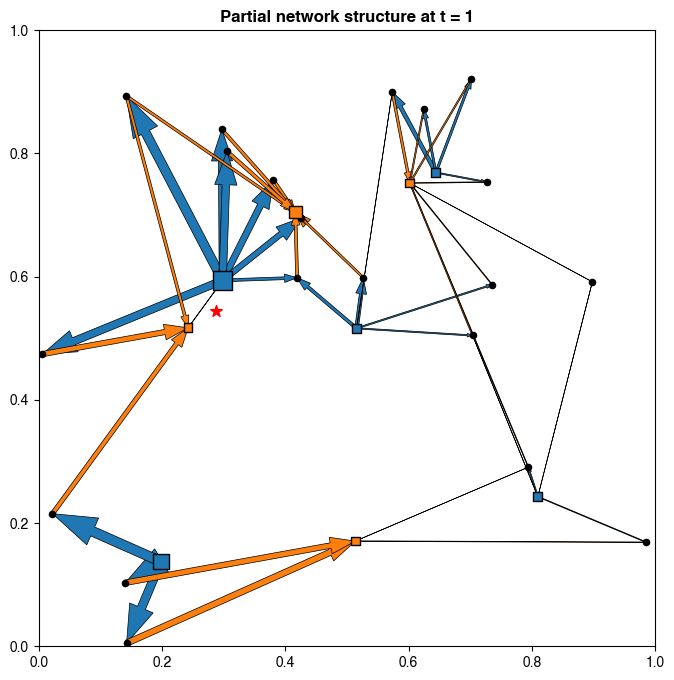

In [124]:
t = 1

plt.figure(figsize = (8, 8))
plt.xlim([0, 1])
plt.ylim([0, 1])
fdict = {"family": "Helvetica", "weight": "bold", "fontsize": 12}
plt.title(f"Partial network structure at t = {t}", fontdict = fdict)
plt.gca().set_aspect("equal", adjustable = "box")

for j in range(8):
    for k in range(20):
        if fjk_sol[j, k, t - 1] > 1e-4:
            plt.arrow(j_loc[j, 0], j_loc[j, 1], k_loc[k, 0] - j_loc[j, 0], k_loc[k, 1] - j_loc[j, 1], width = fjk_sol[j, k, t - 1] / 200000, length_includes_head = True, linewidth = 0.5, facecolor = "tab:blue", edgecolor = "black")

for c in range(8):
    for k in range(20):
        if fkc_sol[k, c, t - 1] > 1e-4:
            plt.arrow(k_loc[k, 0], k_loc[k, 1], c_loc[c, 0] - k_loc[k, 0], c_loc[c, 1] - k_loc[k, 1], width = fkc_sol[k, c, t - 1] / 100000, length_includes_head = True, linewidth = 0.5, facecolor = "tab:orange", edgecolor = "black")

plt.scatter(k_loc[:, 0], k_loc[:, 1], s = 20, color = "k")
plt.scatter(j_loc[:, 0], j_loc[:, 1], s = vj_sol[:, t - 1] * 40, marker = "s", linewidths = 1, edgecolors = "k")
plt.scatter(c_loc[:, 0], c_loc[:, 1], s = vc_sol[:, t - 1] * 40, marker = "s", linewidths = 1, edgecolors = "k")
dc = np.zeros((1, 2))
dc[0, 0] = db["DemCenter0"][[str(t)]].value
dc[0, 1] = db["DemCenter1"][[str(t)]].value
plt.scatter(dc[:, 0], dc[:, 1], color = "r", marker = "*", s = 75)

In [120]:
fjk_sol[:, :, 0]

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  985.14762046,  421.84704954,    0.        ,
        1167.71038134,    0.        ,   41.84635407,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         383.44859459,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        , 2064.33341208, 2970.30499711,
           0.        ,  905.68279184,    0.        , 2277.59238952,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 2452.52687316, 1832.62817115,    0.        ,
           0.        ,    0.        ,   79.022